<a href="https://colab.research.google.com/github/RoseVZ/TensorflowCert/blob/main/Regression_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### **Creating a fake dataset**

In [3]:
X=np.arange(-100,100,2)
X

array([-100,  -98,  -96,  -94,  -92,  -90,  -88,  -86,  -84,  -82,  -80,
        -78,  -76,  -74,  -72,  -70,  -68,  -66,  -64,  -62,  -60,  -58,
        -56,  -54,  -52,  -50,  -48,  -46,  -44,  -42,  -40,  -38,  -36,
        -34,  -32,  -30,  -28,  -26,  -24,  -22,  -20,  -18,  -16,  -14,
        -12,  -10,   -8,   -6,   -4,   -2,    0,    2,    4,    6,    8,
         10,   12,   14,   16,   18,   20,   22,   24,   26,   28,   30,
         32,   34,   36,   38,   40,   42,   44,   46,   48,   50,   52,
         54,   56,   58,   60,   62,   64,   66,   68,   70,   72,   74,
         76,   78,   80,   82,   84,   86,   88,   90,   92,   94,   96,
         98])

In [4]:
y=np.arange(-101,99,2)
y

array([-101,  -99,  -97,  -95,  -93,  -91,  -89,  -87,  -85,  -83,  -81,
        -79,  -77,  -75,  -73,  -71,  -69,  -67,  -65,  -63,  -61,  -59,
        -57,  -55,  -53,  -51,  -49,  -47,  -45,  -43,  -41,  -39,  -37,
        -35,  -33,  -31,  -29,  -27,  -25,  -23,  -21,  -19,  -17,  -15,
        -13,  -11,   -9,   -7,   -5,   -3,   -1,    1,    3,    5,    7,
          9,   11,   13,   15,   17,   19,   21,   23,   25,   27,   29,
         31,   33,   35,   37,   39,   41,   43,   45,   47,   49,   51,
         53,   55,   57,   59,   61,   63,   65,   67,   69,   71,   73,
         75,   77,   79,   81,   83,   85,   87,   89,   91,   93,   95,
         97])

In [5]:
#conversion to tensors
X=tf.constant(X)
X

<tf.Tensor: shape=(100,), dtype=int64, numpy=
array([-100,  -98,  -96,  -94,  -92,  -90,  -88,  -86,  -84,  -82,  -80,
        -78,  -76,  -74,  -72,  -70,  -68,  -66,  -64,  -62,  -60,  -58,
        -56,  -54,  -52,  -50,  -48,  -46,  -44,  -42,  -40,  -38,  -36,
        -34,  -32,  -30,  -28,  -26,  -24,  -22,  -20,  -18,  -16,  -14,
        -12,  -10,   -8,   -6,   -4,   -2,    0,    2,    4,    6,    8,
         10,   12,   14,   16,   18,   20,   22,   24,   26,   28,   30,
         32,   34,   36,   38,   40,   42,   44,   46,   48,   50,   52,
         54,   56,   58,   60,   62,   64,   66,   68,   70,   72,   74,
         76,   78,   80,   82,   84,   86,   88,   90,   92,   94,   96,
         98])>

In [6]:
y=tf.constant(y)
y

<tf.Tensor: shape=(100,), dtype=int64, numpy=
array([-101,  -99,  -97,  -95,  -93,  -91,  -89,  -87,  -85,  -83,  -81,
        -79,  -77,  -75,  -73,  -71,  -69,  -67,  -65,  -63,  -61,  -59,
        -57,  -55,  -53,  -51,  -49,  -47,  -45,  -43,  -41,  -39,  -37,
        -35,  -33,  -31,  -29,  -27,  -25,  -23,  -21,  -19,  -17,  -15,
        -13,  -11,   -9,   -7,   -5,   -3,   -1,    1,    3,    5,    7,
          9,   11,   13,   15,   17,   19,   21,   23,   25,   27,   29,
         31,   33,   35,   37,   39,   41,   43,   45,   47,   49,   51,
         53,   55,   57,   59,   61,   63,   65,   67,   69,   71,   73,
         75,   77,   79,   81,   83,   85,   87,   89,   91,   93,   95,
         97])>

In [7]:
y.shape

TensorShape([100])

In [9]:
X.shape

TensorShape([100])

In [12]:
y_train=y[:80]
y_train

<tf.Tensor: shape=(80,), dtype=int64, numpy=
array([-101,  -99,  -97,  -95,  -93,  -91,  -89,  -87,  -85,  -83,  -81,
        -79,  -77,  -75,  -73,  -71,  -69,  -67,  -65,  -63,  -61,  -59,
        -57,  -55,  -53,  -51,  -49,  -47,  -45,  -43,  -41,  -39,  -37,
        -35,  -33,  -31,  -29,  -27,  -25,  -23,  -21,  -19,  -17,  -15,
        -13,  -11,   -9,   -7,   -5,   -3,   -1,    1,    3,    5,    7,
          9,   11,   13,   15,   17,   19,   21,   23,   25,   27,   29,
         31,   33,   35,   37,   39,   41,   43,   45,   47,   49,   51,
         53,   55,   57])>

In [13]:
X_train=X[:80]

In [17]:
X_test=X[80:100]
X_test

<tf.Tensor: shape=(20,), dtype=int64, numpy=
array([60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92,
       94, 96, 98])>

In [18]:
y_test=y[80:100]

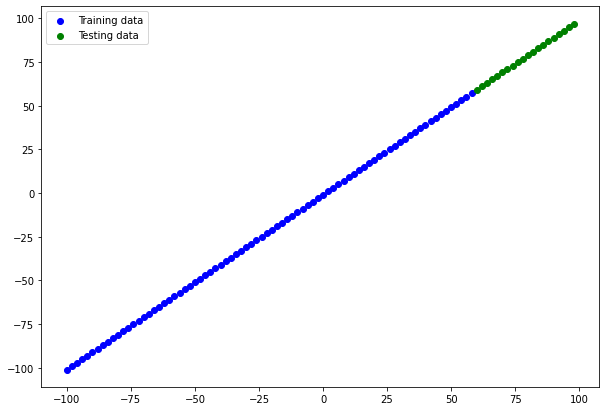

In [26]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [27]:
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1],activation='relu')]
)
model_1.compile(loss='mae',
                optimizer='adam',
                metrics=['mae'])

In [29]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# 2d Plot of the model 

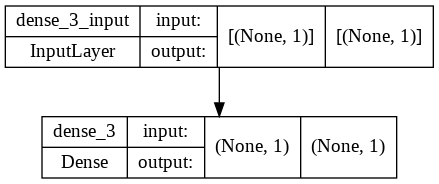

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, show_shapes=True)

# Training Data

In [ ]:
model_1.fit(X_train,y_train,epochs=100)

In [33]:
y_pred = model_1.predict(X_test)
y_pred

array([[3.1732848],
       [3.2821038],
       [3.3909228],
       [3.4997418],
       [3.6085608],
       [3.7173798],
       [3.8261988],
       [3.9350176],
       [4.0438366],
       [4.1526556],
       [4.2614746],
       [4.3702936],
       [4.4791126],
       [4.5879316],
       [4.6967506],
       [4.8055696],
       [4.9143887],
       [5.0232077],
       [5.1320267],
       [5.2408457]], dtype=float32)

# defining a visualizing function

In [45]:
def plot_preds(train_data=X_train,train_label=y_train,test_data=X_test,test_label=y_test,predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_label,c='b',label='Training data')
  plt.scatter(test_data,test_label,c='g',label='Test data')
  plt.scatter(predictions,test_label,c='r',label='Predictions')
  plt.legend()

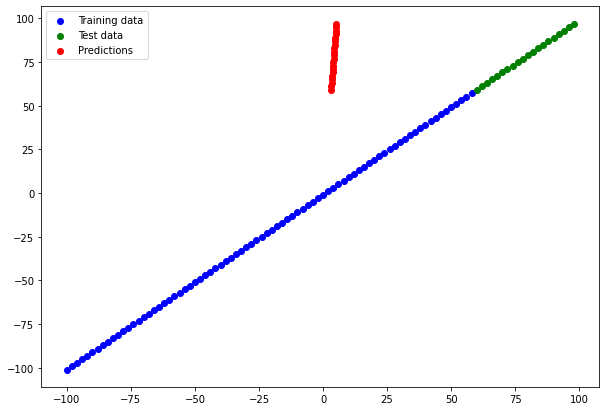

In [47]:
plot_preds(X_train,y_train,X_test,y_test,y_pred)


#Evaluation

In [48]:
model_1.evaluate(X_test,y_test)

1/1 [==============================] - 0s 240ms/step - loss: 73.7929 - mae: 73.7929


[73.79293823242188, 73.79293823242188]

In [68]:
def mae(y_test, y_preds):
  return tf.metrics.mean_absolute_error(y_test,
                                        y_preds)
def mse(y_test,y_preds):
  return tf.metrics.mean_squared_error(y_test,y_preds)
  

In [53]:
mae_1=mae(y_test,y_pred)
mae_1
#here we get an array of values as shapes of y_test and y_pred arent same

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([74.82671 , 74.717896, 74.60908 , 74.50026 , 74.39144 , 74.28262 ,
       74.1738  , 74.06498 , 73.95616 , 73.84734 , 73.738525, 73.62971 ,
       73.52089 , 73.41207 , 73.30325 , 73.19443 , 73.08561 , 72.97679 ,
       72.86797 , 72.759155], dtype=float32)>

In [55]:
y_pred=tf.squeeze(y_pred)
y_pred.shape

TensorShape([20])

In [58]:
mae_2=mae(y_test,y_pred)
mae_2
#single value here after squeeze

<tf.Tensor: shape=(), dtype=float32, numpy=73.79294>

In [60]:
mse_2=mse(y_test,y_pred)
mse_2

<tf.Tensor: shape=(), dtype=float32, numpy=5564.318>

#Model 2

In [62]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1],activation='relu'),
    tf.keras.layers.Dense(1)

])

model_2.compile(loss='mse',optimizer='adam',metrics=['mse'])

In [63]:
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 5ms/step - loss: 2411.8816 - mse: 2411.8816
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 2261.9434 - mse: 2261.9434
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 2104.1453 - mse: 2104.1453
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 1951.8984 - mse: 1951.8984
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 1824.5652 - mse: 1824.5652
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 1681.3289 - mse: 1681.3289
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 1554.7629 - mse: 1554.7629
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 1431.4690 - mse: 1431.4690
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 1317.2654 - mse: 1317.2654
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 1205.3922 - mse: 1205.3922
Epoch 11/100
3/3 [=

# Plot

In [64]:
y_pred_2=model_2.predict(X_test)

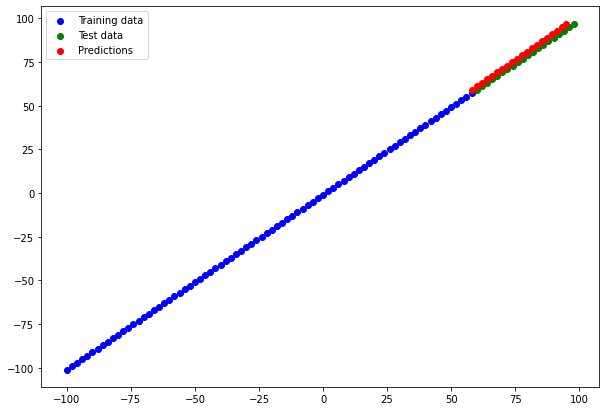

In [65]:
plot_preds(X_train,y_train,X_test,y_test,y_pred_2)

In [75]:
mse3=mse(y_test,tf.squeeze(y_pred_2))
mse3

<tf.Tensor: shape=(), dtype=float32, numpy=1.9455426>

In [73]:
mae3=mae(y_test,tf.squeeze(y_pred_2))
mae3

<tf.Tensor: shape=(), dtype=float32, numpy=1.3402941>

#Comparing results of two models

In [71]:
import pandas as pd

In [81]:
model_results=[['model_1',mae_2.numpy(),mse_2.numpy()],
               ['model_2',mae3.numpy(),mse3.numpy()]]

In [82]:
results= pd.DataFrame(model_results,columns=['model_name','mae','mse'])
results

,model_name,mae,mse
0,model_1,73.792938,5564.317871
1,model_2,1.340294,1.945543


# Saving models

## Saved Model Format

In [83]:
model_2.save("Regression_Best_Model")
#.pb extension is a PureBasic Programming Language

## HDH5 format

In [84]:
model_2.save("Model.h5")

#loading the models

In [85]:
loaded_SavedModel=tf.keras.models.load_model('/content/Regression_Best_Model')
loaded_SavedModel.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [86]:
loaded_Hdh5=tf.keras.models.load_model('/content/Model.h5')
loaded_Hdh5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [89]:
tf.squeeze(loaded_SavedModel(X_test,y_test))

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([58.29598 , 60.229004, 62.162025, 64.09505 , 66.028076, 67.961105,
       69.89413 , 71.827156, 73.76017 , 75.6932  , 77.62622 , 79.55924 ,
       81.49226 , 83.425285, 85.358315, 87.29133 , 89.224365, 91.15738 ,
       93.09041 , 95.02342 ], dtype=float32)>

In [92]:
tf.squeeze(y_pred_2)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([58.29598 , 60.229004, 62.162025, 64.09505 , 66.028076, 67.961105,
       69.89413 , 71.827156, 73.76017 , 75.6932  , 77.62622 , 79.55924 ,
       81.49226 , 83.425285, 85.358315, 87.29133 , 89.224365, 91.15738 ,
       93.09041 , 95.02342 ], dtype=float32)>

In [93]:
y_pred_2==loaded_SavedModel(X_test,y_test)

<tf.Tensor: shape=(20, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

In [94]:
#Same results..the loaded model is accurate

## Downloading the models

### 1. Direct Download
### 2. Code

In [95]:
from google.colab import files
files.download('/content/Model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
from google.colab import files
files.download('/content/Regression_Best_Model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 3. Gogle Drive

In [97]:
!cp /content/model.png /content/drive/MyDrive